# Bài tập 1: Vary p in the Watts-Strogatz model and plot clustering vs. path length.

..................................................

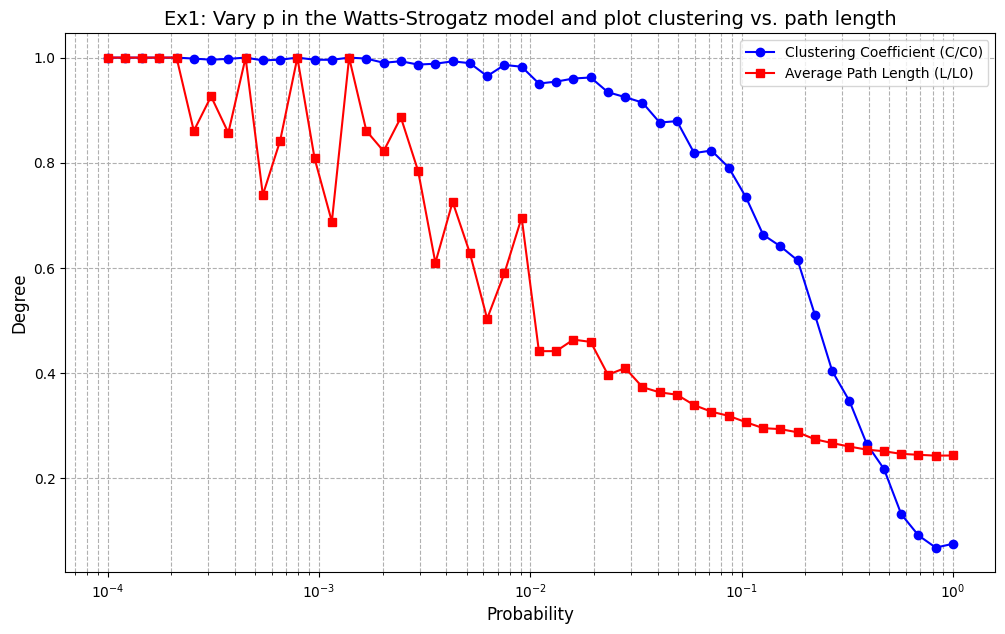

In [6]:
# Step 1: Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Set up model parameters
n = 200  # Number of nodes in the network
k = 10   # Each node is initially connected to k nearest neighbors
# Create a range of p values, focusing on small values
# np.logspace creates numbers evenly spaced on a log scale, which is useful here
p_values = np.logspace(-4, 0, 50)  # 50 points from 0.0001 to 1

# Lists to store the results
clustering_coeffs = []
path_lengths = []

# Step 3: Loop through the values of p
for p in p_values:
    # Generate a Watts-Strogatz graph with the current p value
    G = nx.watts_strogatz_graph(n, k, p)
    
    # Calculate the average clustering coefficient and store it
    clustering = nx.average_clustering(G)
    clustering_coeffs.append(clustering)
    
    # Calculate the average shortest path length and store it
    path_length = nx.average_shortest_path_length(G)
    path_lengths.append(path_length)
    
    # Print a dot to show 
    # progress
    print(".", end="")
# Step 4: Normalize the data for easy comparison
# Get the initial values at p=0 to use as a baseline
C0 = clustering_coeffs[0]
L0 = path_lengths[0]

# Divide all values by the initial value to see the relative change
normalized_C = [c / C0 for c in clustering_coeffs]
normalized_L = [l / L0 for l in path_lengths]

# Step 5: Plot the results
plt.figure(figsize=(12, 7))

# Plot the line for the clustering coefficient
plt.plot(p_values, normalized_C, 'bo-', label='Clustering Coefficient (C/C0)')

# Plot the line for the average path length
plt.plot(p_values, normalized_L, 'rs-', label='Average Path Length (L/L0)')

# Set the x-axis to a log scale to see the effect at small p values more clearly
plt.xscale('log')

# Add labels and a title to the plot
plt.title('Ex1: Vary p in the Watts-Strogatz model and plot clustering vs. path length', fontsize=14)
plt.xlabel('Probability', fontsize=12)
plt.ylabel('Degree', fontsize=12)
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

# Bài tập 2: Vary m in the BA model and analyze how it affects the hub structure.


Analyzing BA model for different m values...
For m = 1, Max Degree (largest hub) is: 30
For m = 2, Max Degree (largest hub) is: 84
For m = 5, Max Degree (largest hub) is: 90
For m = 8, Max Degree (largest hub) is: 114


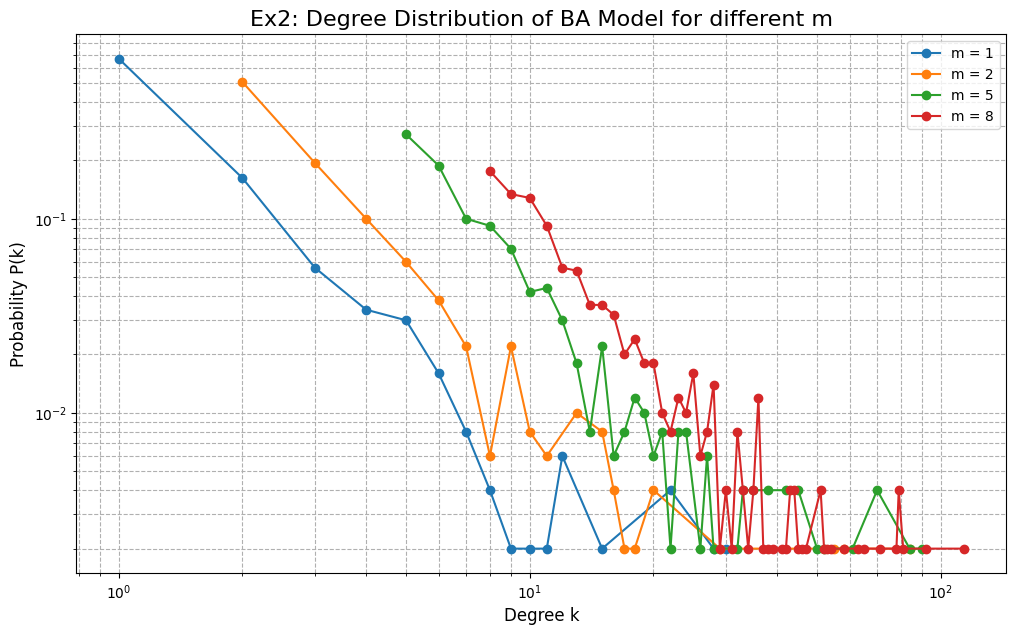

In [8]:
# Step 1: Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Step 2: Set up model parameters
n = 500  # Total number of nodes in the network
# We will test these different values for m
m_values = [1, 2, 5, 8]

# Prepare the plot for degree distributions
plt.figure(figsize=(12, 7))

print("Analyzing BA model for different m values...")

# Step 3: Loop through each value of m
for m in m_values:
    # Generate a Barabási-Albert graph
    G = nx.barabasi_albert_graph(n, m)
    
    # --- Analysis ---
    # Get the list of degrees of all nodes
    degrees = [d for node, d in G.degree()]
    
    # Calculate the maximum degree as a simple metric for the largest hub
    max_degree = max(degrees)
    print(f"For m = {m}, Max Degree (largest hub) is: {max_degree}")
    
    # --- Plotting the Degree Distribution ---
    # Count how many nodes have each degree
    degree_counts = Counter(degrees)
    # Get the unique degrees and their counts
    deg, cnt = zip(*sorted(degree_counts.items()))
    
    # Normalize the counts to get probabilities
    cnt = np.array(cnt) / n
    
    # Plot on a log-log scale
    plt.loglog(deg, cnt, 'o-', label=f'm = {m}')

# Step 4: Finalize and show the plot
plt.title('Ex2: Degree Distribution of BA Model for different m', fontsize=16)
plt.xlabel('Degree k', fontsize=12)
plt.ylabel('Probability P(k)', fontsize=12)
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Bài tập 3: Plot and compare degree distributions between ER, WS, and BA networks.

Generating ER network...
Generating WS network...
Generating BA network...


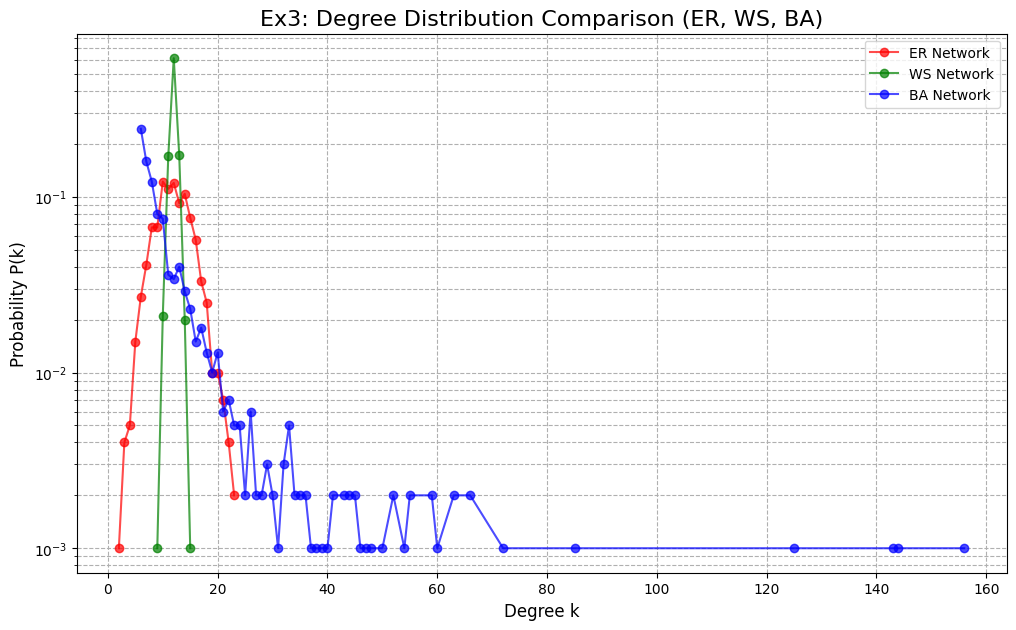

In [10]:
# Step 1: Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Step 2: Set up base parameters for a fair comparison
n = 1000  # Number of nodes for all networks
avg_degree = 12  # We want all networks to have this average degree

# Step 3: Calculate specific parameters for each model
# For ER model, avg_degree = p * (n - 1)
p_er = avg_degree / (n - 1)

# For WS model, we set k directly to the average degree
k_ws = avg_degree
p_ws = 0.05  # A small rewiring probability to maintain small-world properties

# For BA model, avg_degree is approx. 2*m
m_ba = int(avg_degree / 2)

# Step 4: Generate the graphs
print("Generating ER network...")
G_er = nx.erdos_renyi_graph(n, p_er)
print("Generating WS network...")
G_ws = nx.watts_strogatz_graph(n, k_ws, p_ws)
print("Generating BA network...")
G_ba = nx.barabasi_albert_graph(n, m_ba)

graphs = {
    'ER Network': G_er,
    'WS Network': G_ws,
    'BA Network': G_ba
}
colors = {'ER Network': 'red', 'WS Network': 'green', 'BA Network': 'blue'}

# Step 5: Plot all degree distributions on one graph
plt.figure(figsize=(12, 7))

for name, G in graphs.items():
    # Get the list of degrees
    degrees = [d for node, d in G.degree()]
    
    # Count the frequency of each degree
    degree_counts = Counter(degrees)
    deg, cnt = zip(*sorted(degree_counts.items()))
    
    # Normalize to get probability
    cnt = np.array(cnt) / n
    
    # Plotting
    plt.plot(deg, cnt, 'o', linestyle='-', label=name, color=colors[name], alpha=0.7)

# Step 6: Finalize the plot
plt.title('Ex3: Degree Distribution Comparison (ER, WS, BA)', fontsize=16)
plt.xlabel('Degree k', fontsize=12)
plt.ylabel('Probability P(k)', fontsize=12)
# Using a log scale on the y-axis helps visualize the tails
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Bài tập 4: Compute centrality measures and identify key nodes.

Generating networks...
--- Analyzing Centrality for: ER Network ---
Top 5 Nodes by Degree Centrality:      [(179, '0.0401'), (23, '0.0381'), (203, '0.0381'), (229, '0.0381'), (495, '0.0381')]
Top 5 Nodes by Betweenness Centrality: [(229, '0.0131'), (179, '0.0129'), (23, '0.0128'), (203, '0.0115'), (7, '0.0114')]
Top 5 Nodes by Eigenvector Centrality: [(179, '0.1034'), (495, '0.0953'), (203, '0.0938'), (229, '0.0856'), (482, '0.0843')]
--------------------------------------------------\n
--- Analyzing Centrality for: WS Network ---
Top 5 Nodes by Degree Centrality:      [(106, '0.0261'), (0, '0.0240'), (29, '0.0240'), (35, '0.0240'), (64, '0.0240')]
Top 5 Nodes by Betweenness Centrality: [(64, '0.0566'), (106, '0.0505'), (83, '0.0436'), (7, '0.0398'), (147, '0.0359')]
Top 5 Nodes by Eigenvector Centrality: [(471, '0.0885'), (106, '0.0839'), (474, '0.0805'), (476, '0.0795'), (477, '0.0791')]
--------------------------------------------------\n
--- Analyzing Centrality for: BA Network ---

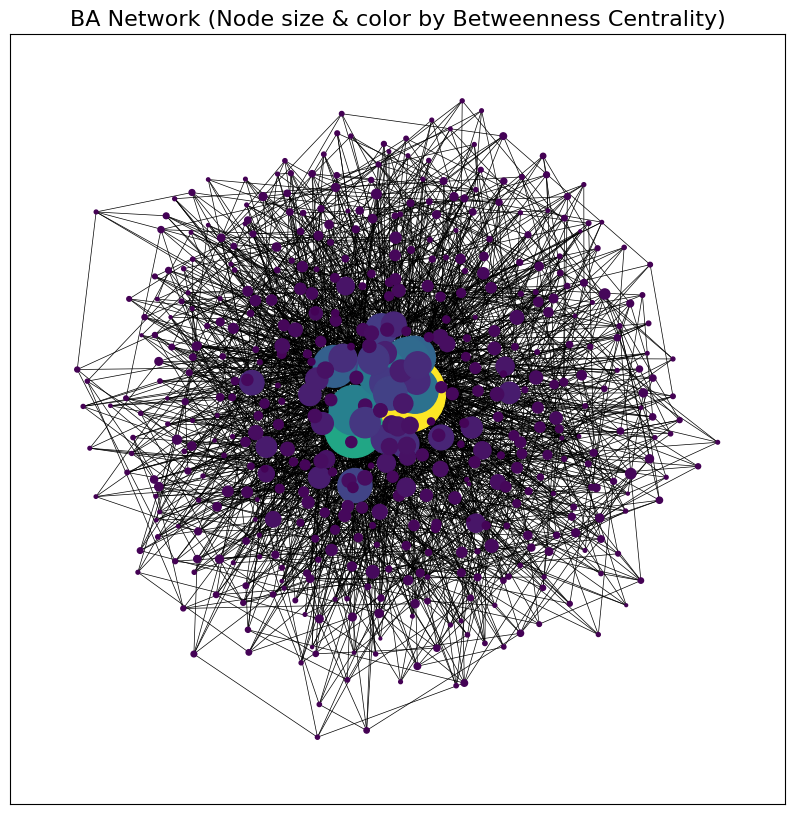

In [11]:
# Step 1: Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Set up and generate the three comparable networks
# (Using the same setup as the previous exercise)
n = 500  # Using a slightly smaller n to speed up centrality calculations
avg_degree = 10

# ER parameters
p_er = avg_degree / (n - 1)
# WS parameters
k_ws = avg_degree
p_ws = 0.05
# BA parameters
m_ba = int(avg_degree / 2)

print("Generating networks...")
G_er = nx.erdos_renyi_graph(n, p_er)
G_ws = nx.watts_strogatz_graph(n, k_ws, p_ws)
G_ba = nx.barabasi_albert_graph(n, m_ba)

graphs = {
    'ER Network': G_er,
    'WS Network': G_ws,
    'BA Network': G_ba
}

# Step 3: Define a function to analyze and print top nodes
def analyze_centrality(graph_name, G):
    """Computes and prints top 5 nodes for different centrality measures."""
    print(f"--- Analyzing Centrality for: {graph_name} ---")
    
    # Calculate centrality measures
    # Note: Eigenvector centrality may not converge for some graphs, so we use a try-except block
    try:
        deg_cent = nx.degree_centrality(G)
        bet_cent = nx.betweenness_centrality(G)
        eig_cent = nx.eigenvector_centrality(G, max_iter=1000) # Increased max_iter for convergence
    except nx.PowerIterationFailedConvergence:
        print("Eigenvector centrality did not converge.")
        eig_cent = {node: 0.0 for node in G.nodes()} # Assign default values

    # Helper function to sort and get top n nodes
    def get_top_nodes(centrality_dict, n=5):
        # Sorts the dictionary by value in descending order and returns the top n items
        sorted_items = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
        # Format for better readability
        formatted_items = [(node, f"{value:.4f}") for node, value in sorted_items[:n]]
        return formatted_items

    # Print the results
    print(f"Top 5 Nodes by Degree Centrality:      {get_top_nodes(deg_cent)}")
    print(f"Top 5 Nodes by Betweenness Centrality: {get_top_nodes(bet_cent)}")
    print(f"Top 5 Nodes by Eigenvector Centrality: {get_top_nodes(eig_cent)}")
    print("-" * 50 + "\\n")

# Step 4: Run the analysis for each graph
for name, G in graphs.items():
    analyze_centrality(name, G)

# Step 5: Visualize the BA network to "see" the key nodes
print("--- Visualizing Centrality in BA Network ---")
# Using betweenness centrality for visualization
centrality = nx.betweenness_centrality(G_ba)
node_sizes = [v * 20000 for v in centrality.values()] # Scale size by centrality
node_colors = [v for v in centrality.values()] # Scale color by centrality

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_ba, seed=42)
nx.draw_networkx(G_ba, pos,
                 node_size=node_sizes,
                 node_color=node_colors,
                 cmap=plt.cm.viridis,
                 with_labels=False,
                 width=0.5)
plt.title("BA Network (Node size & color by Betweenness Centrality)", fontsize=16)
plt.show()